In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.neighbors import NearestNeighbors

K-nearest neighbors (KNN) is a popular machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution. Instead, it relies on the proximity of data points to make predictions.

Here's how KNN works:

1. **Training Phase**: During the training phase, KNN stores the entire training dataset in memory. This dataset consists of labeled examples, where each example is a data point with a set of features and a corresponding class or value.

2. **Prediction Phase**: When a new, unlabeled data point is given, KNN predicts its class or value based on the k nearest neighbors in the training dataset. The value of k is a hyperparameter that needs to be specified beforehand.

3. **Distance Calculation**: To determine the nearest neighbors, KNN calculates the distance between the new data point and all the points in the training dataset. The most commonly used distance metric is Euclidean distance, but other metrics like Manhattan distance or Minkowski distance can also be used.

4. **Voting or Averaging**: Once the k nearest neighbors are identified, KNN uses a voting mechanism for classification tasks or averaging for regression tasks to determine the final prediction. For classification, the class with the majority vote among the neighbors is assigned to the new data point. For regression, the average of the values of the k nearest neighbors is taken as the prediction.

KNN has several advantages and disadvantages:

**Advantages:**
- Simplicity: KNN is easy to understand and implement, making it a good starting point for beginners.
- No Training Phase: KNN doesn't require an explicit training phase, as it stores the entire training dataset. This makes it suitable for online learning scenarios where new data points arrive continuously.
- Non-parametric: KNN makes no assumptions about the underlying data distribution, making it versatile and applicable to a wide range of problems.
- Interpretable: KNN provides transparency in its predictions, as the neighbors used for prediction can be examined and understood.

**Disadvantages:**
- Computational Complexity: As the size of the training dataset grows, the time required to make predictions using KNN increases significantly. This can make KNN inefficient for large datasets.
- Sensitivity to Feature Scaling: KNN relies on distance calculations, so it is sensitive to the scale of the features. It is important to normalize or scale the features before applying KNN.
- Curse of Dimensionality: KNN performance deteriorates as the number of features increases. This is known as the curse of dimensionality, where the data becomes sparse in high-dimensional spaces.
- Imbalanced Data: KNN can be biased towards the majority class in imbalanced datasets, as the majority class is more likely to dominate the k nearest neighbors.

There are also variations and techniques that can be applied to improve the performance of KNN, such as weighted KNN, distance-weighted voting, and feature selection techniques to reduce the dimensionality of the data.

Overall, KNN is a versatile and intuitive algorithm that can be used for various machine learning tasks. However, it is important to consider its limitations and choose appropriate preprocessing techniques based on the characteristics of the dataset.

***EXERCISE 1***

In [3]:
data = {
    'Feature 1': [4, 1, 9, 7, 10, 12, 14, 8],
    'Feature 2': [1, 2, 14, 5, 16, 18, 10, 10]
}

df = pd.DataFrame(data)
df.head()

,Feature 1,Feature 2
0,4,1
1,1,2
2,9,14
3,7,5
4,10,16


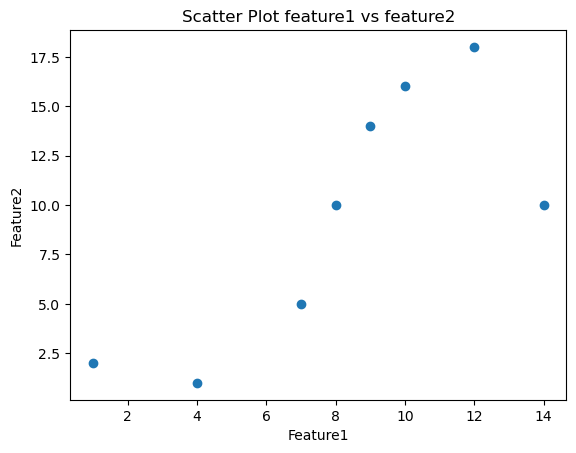

In [4]:
plt.scatter(df['Feature 1'], df['Feature 2'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot feature1 vs feature2')
plt.show()

[(7, 5), (4, 1), (8, 10), (14, 10)]


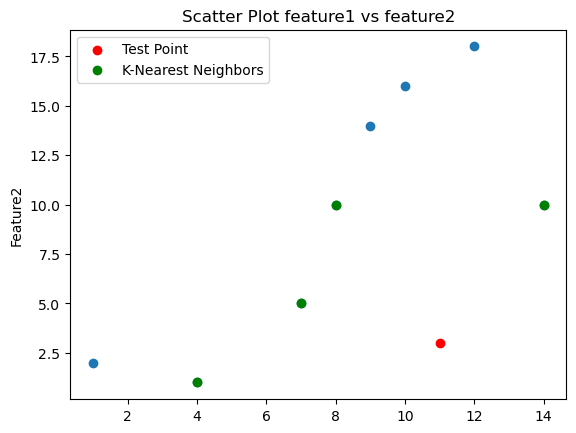

In [28]:
def euclidean_distance(point1, point2):
    distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return distance

def knn(df, test_point, k):
    distances = []

    for i in range(len(df)):
        train_point = (df['Feature 1'][i], df['Feature 2'][i])
        distance = euclidean_distance(test_point, train_point)
        distances.append((distance, train_point))

    distances.sort()

    return [point for distance, point in distances[:k]]


test_point = (11, 3)
k = 4
k_nearest_neighbors = knn(df, test_point=test_point, k=k)

print(k_nearest_neighbors)

plt.scatter(df['Feature 1'], df['Feature 2'])
plt.scatter(test_point[0], test_point[1], color='red', label='Test Point')  

x_coords = [point[0] for point in k_nearest_neighbors]
y_coords = [point[1] for point in k_nearest_neighbors]

plt.scatter(x_coords, y_coords, color='green', label='K-Nearest Neighbors')  

plt.ylabel('Feature2')
plt.title('Scatter Plot feature1 vs feature2')
plt.legend()
plt.show()


C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[[3 0 7 6]]


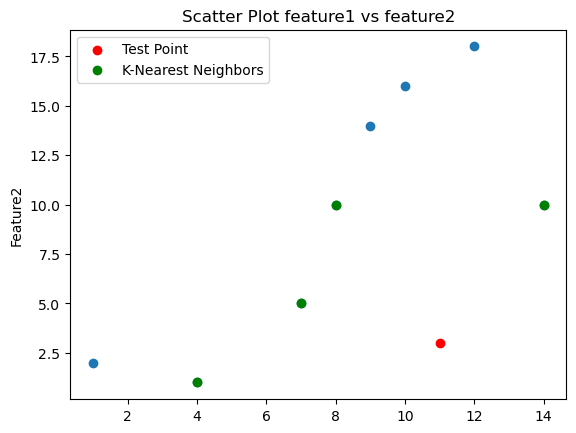

In [29]:
test_point = (11, 3)
k = 4
distances, k_nearest_neighbors = NearestNeighbors(n_neighbors=k).fit(df).kneighbors([test_point])

print(k_nearest_neighbors)

plt.scatter(df['Feature 1'], df['Feature 2'])
plt.scatter(test_point[0], test_point[1], color='red', label='Test Point')  


x_coords = [df['Feature 1'][i] for i in k_nearest_neighbors[0]]
y_coords = [df['Feature 2'][i] for i in k_nearest_neighbors[0]]

plt.scatter(x_coords, y_coords, color='green', label='K-Nearest Neighbors')  
plt.ylabel('Feature2')
plt.title('Scatter Plot feature1 vs feature2')
plt.legend()
plt.show()

***EXERCISE 2***

In [7]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [37]:
iris = load_iris()


X = iris.data
y = iris.target


knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [38]:
observations = [
    [5.4, 3.3, 5.9, 1.1], 
    [1, 1, 1, 1]
]

predicted_classes = knn.predict(observations)
print(predicted_classes)
predicted_class_names = iris.target_names[predicted_classes]

print(predicted_class_names)

[2 0]
['virginica' 'setosa']


Best k: 15
Best accuracy: 0.9866666666666667


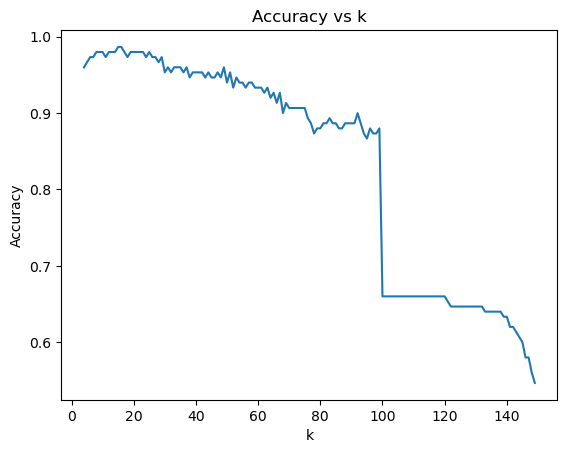

In [47]:
from sklearn.metrics import accuracy_score

best_k = 0
best_score = 0
accuracy_scores = []
for k in range(4, 150):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores.append((accuracy, k))
    if accuracy > best_score :
        best_k = k
        best_score = accuracy
     
print(f"Best k: {best_k}")
print(f"Best accuracy: {best_score}")


k_values = [k for accuracy, k in accuracy_scores]
accuracy_values = [accuracy for accuracy, k in accuracy_scores]

plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()
